1. 인간의 신경계를 모사한 뉴런이야기<br>
<br>
axon(축삭돌기) :  팔처럼 몸체에서 뻗어나와 다른 뉴런의 수상돌기와 연결된다.<br>
dendrite(수상돌기) : 다른 뉴런의 축삭돌기와 연결되며, 몸체에 나뭇가지 형태로 붙어 있다.<br>
synapse(시냅스) : 축삭돌기와 수상돌기가 연결된 지점입니다. 여기서 한 뉴런이 다른 뉴런으로 신호를 전달한다.<br>
<br>
x0,x1,x2 : 입력되는 뉴런의 축삭돌기로부터 전달되는 신호의 양을 나타냄.<br>
w0,w1,w2 : 시냅스의 강도, 즉 입력되는 뉴런의 영향력을 나타냄.<br>
w0x0 + w1x1 + w2x2 :  입력되는 신호의 양과 해당 신호의 시냅스 강도가 곱해진 값의 합계를 나타냄<br>
f : 최종 합계가 다른 뉴런에게 전달되는 신호의 양을 결정짓는 규칙 -> 활성화 함수라고 부름<br>
<br>
각 뉴런들은 하나의 신호가 출력되므로 두 개의 신호를 보내줄려면 두 개의 신호가 출력되게 뉴런을 2개를 만들어야 한다.

2. 입출력을 모두 연결해주는 Dense 레이어<br>
<br>
Dense 레이어 :  입력과 출력을 모두 연결해줌 ex) 입력 뉴런: 4개, 출력 뉴런 : 8개 -> 총 연결선 : 32개(4x8)<br>
가중치 : 연결강도를 의미 -> 각 연결선에는 가중치가 포함되어 있음 ex) 연결선 = 가중치<br>

>가중치가 높을수록 해당 입력 뉴런이 출력 뉴런에 미치는 영향이 크고, 낮을수록 미치는 영향이 작다.

>Dense(8, input_dim=4, activation='relu')

첫번째 인자 : 출력 뉴런의 수를 설정합니다.<br>
input_dim : 입력 뉴런의 수를 설정합니다.<br>
activation : 활성화 함수를 설정해줍니다.<br>

>linear : 디폴트 값, 입력뉴런과 가중치로 계산된 결과값이 그대로 출력으로 나옴.<br>
>relu : rectifier 함수, 은닉층에 주로 쓰임.<br>
>sigmoid : 시그모이드 함수, 이진 분류 문제에서 출력층에 주로 쓰임<br>
>softmax : 소프트맥스 함수, 다중 클래스 분류 문제에서 출력층에 주로 쓰임

Dense 레이어는 입력 뉴런 수에 상관없이 출력 뉴런 수를 자유롭게 설정할 수 있기 때문에 출력층으로 많이 쓰인다.<br>
<br>
이진 분류 문제에서는 0과 1을 나타내는 출력 뉴런이 하나만 있으면 되기 때문에 아래 코드처럼 출력 뉴런이 1개이고, 입력 뉴런과 가중치를 계산한 값을 0에서 1 사이로 표현할 수 있는 sigmoid 사용한다.
    
>Dense(1, input_dim=3, activation='sigmoid')
    
다중 클래스 분류 문제에서는 클래스 수만큼 출력 뉴런이 필요하다.<br>
만약 세 가지 분류한다면, 아래 코드처럼 출력 뉴런이 3개고 입력 뉴런과 가중치를 계산한 값을 각 클래스의 확률 개념으로 표현할 수 있는 활성화 함수인 softmax 함수를 사용한다.<br>

>Dense(3, input_dim=4, activation='softmax') -> 3x4 = 12개의 시냅스 강도

Dense 레이어는 보통 출력층 이전의 은닉층으로 많이 쓰인다.<br>
영상이 아닌 수치자료 입력 시에는 입력층으로 많이 쓰인다.<br>
이 때 많이 쓰이는 활성화 함수가 relu로 쓰인다. relu는 학습과정에서 역전파 시에 좋은 성능이 나오는 것으로 알려져 있다.<br>

>Dense(4, input_dim=6, activation='relu')

입력층이 아닐 때에는 이전층의 출력 뉴런 수를 알 수 없기 때문에 input_dim 지정하지 않아도 된다.<br>
아래 코드를 보면, 입력층에만 input_dim를 정의하였고 이후 층에서는 input_dim을 지정하지 않아도 된다.<br>

>model.add(Dense(8, input_dim=4, activation='relu'))<br>
>model.add(Dense(6, activation='relu'))<br>
>model.add(Dense(1, activation='sigmoid'))

In [1]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()

model.add(Dense(8, input_dim=4, activation='relu'))
model.add(Dense(6, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


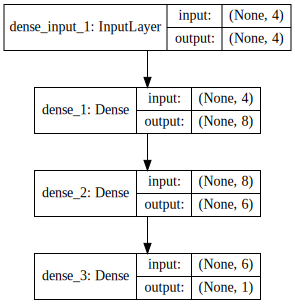

In [2]:
from IPython.display import SVG
from keras.utils.visualize_util import model_to_dot

%matplotlib inline

SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))